In [1]:
from skimage.io import imread
from scipy.ndimage import gaussian_filter, gaussian_laplace
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from skimage.filters import sobel_h, sobel_v, sobel
from time import time
import numpy as np

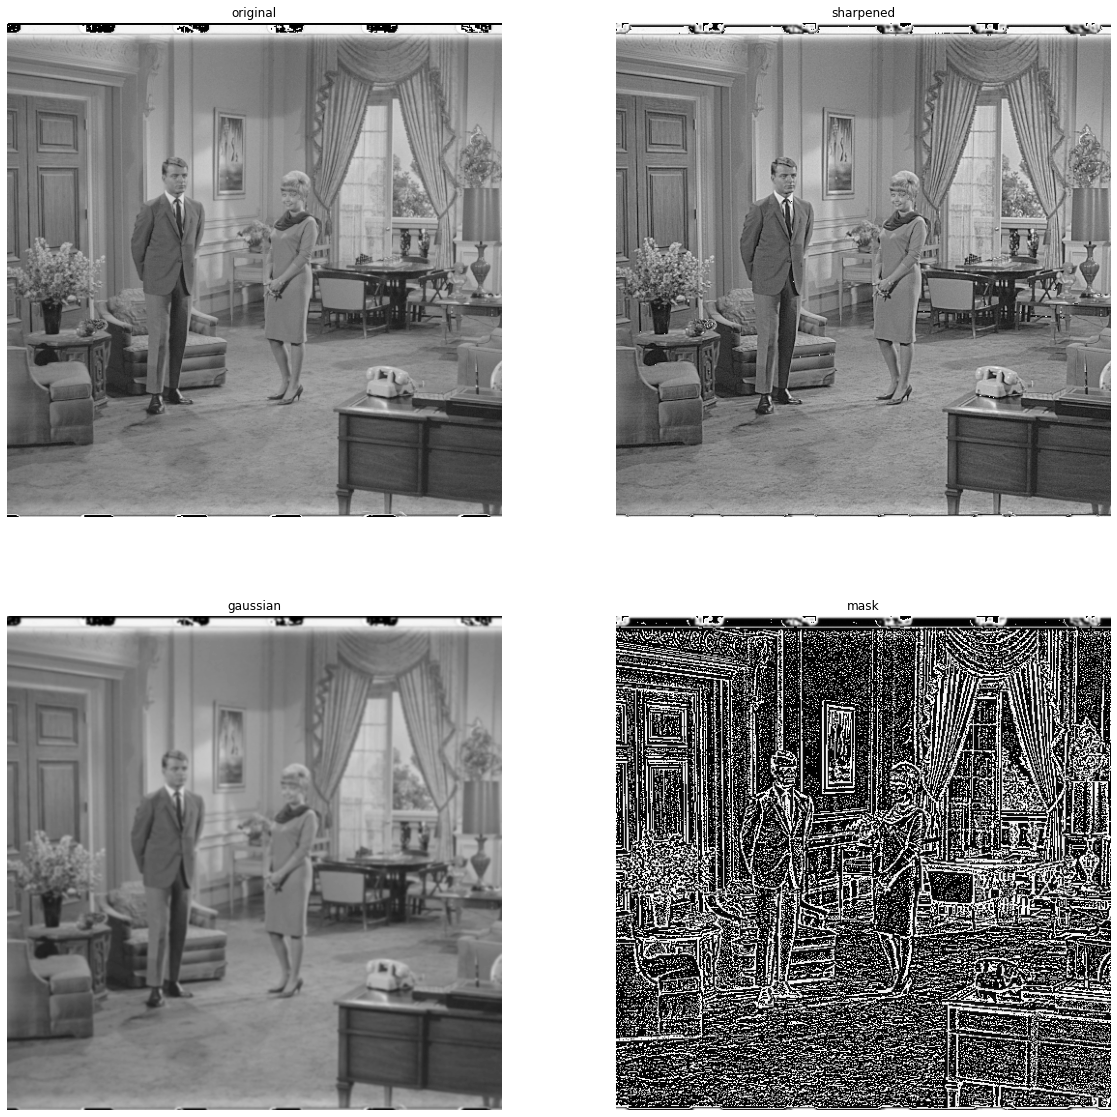

In [2]:
# Exercise 1

im = imread('couple.tiff')

imGa = gaussian_filter(im, 1)

mask = im - imGa

imSh = im + mask

plt.figure(figsize=(20, 20))
plt.subplot(221), plt.imshow(im, cmap='gray'), plt.title('original'), plt.axis('off')
plt.subplot(222), plt.imshow(imSh, cmap='gray'), plt.title('sharpened'), plt.axis('off')
plt.subplot(223), plt.imshow(imGa, cmap='gray'), plt.title('gaussian'), plt.axis('off')
plt.subplot(224), plt.imshow(mask, cmap='gray'), plt.title('mask'), plt.axis('off')
plt.show()

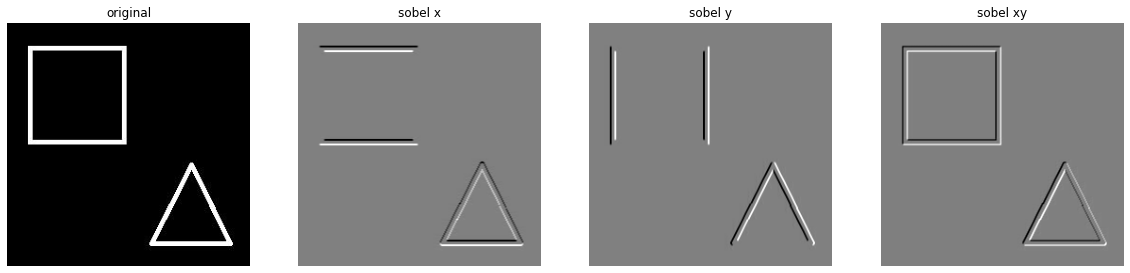

In [3]:
# Exercise 2.1

im = imread('SandT.jpg')

sobelX = [
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
]

sobelY = [
    [-1,  0,  1],
    [-2,  0,  2],
    [-1,  0,  1]
]

imSoX = convolve2d(im, sobelX)
imSoY = convolve2d(im, sobelY)
imSoXY = imSoX + imSoY

plt.figure(figsize=(20, 10))
plt.subplot(141), plt.imshow(im, cmap='gray'), plt.title('original'), plt.axis('off')
plt.subplot(142), plt.imshow(imSoX, cmap='gray'), plt.title('sobel x'), plt.axis('off')
plt.subplot(143), plt.imshow(imSoY, cmap='gray'), plt.title('sobel y'), plt.axis('off')
plt.subplot(144), plt.imshow(imSoXY, cmap='gray'), plt.title('sobel xy'), plt.axis('off')
plt.show()

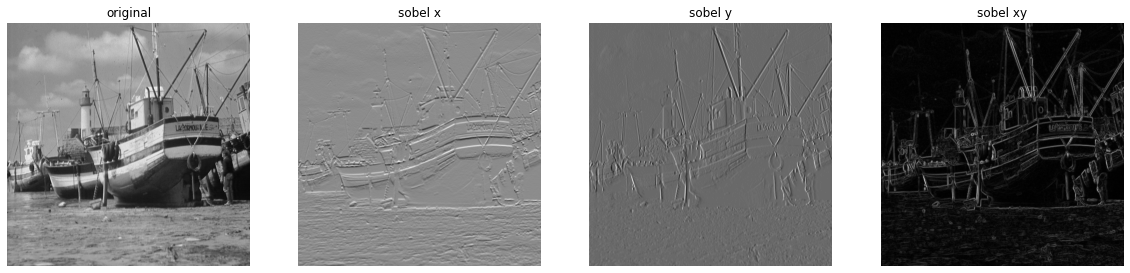

In [4]:
# Exercise 2.2

im = imread('fishing_boat.tiff')

imSoX = sobel_h(im)
imSoY = sobel_v(im)
imSoXY = sobel(im)

plt.figure(figsize=(20, 10))
plt.subplot(141), plt.imshow(im, cmap='gray'), plt.title('original'), plt.axis('off')
plt.subplot(142), plt.imshow(imSoX, cmap='gray'), plt.title('sobel x'), plt.axis('off')
plt.subplot(143), plt.imshow(imSoY, cmap='gray'), plt.title('sobel y'), plt.axis('off')
plt.subplot(144), plt.imshow(imSoXY, cmap='gray'), plt.title('sobel xy'), plt.axis('off')
plt.show()

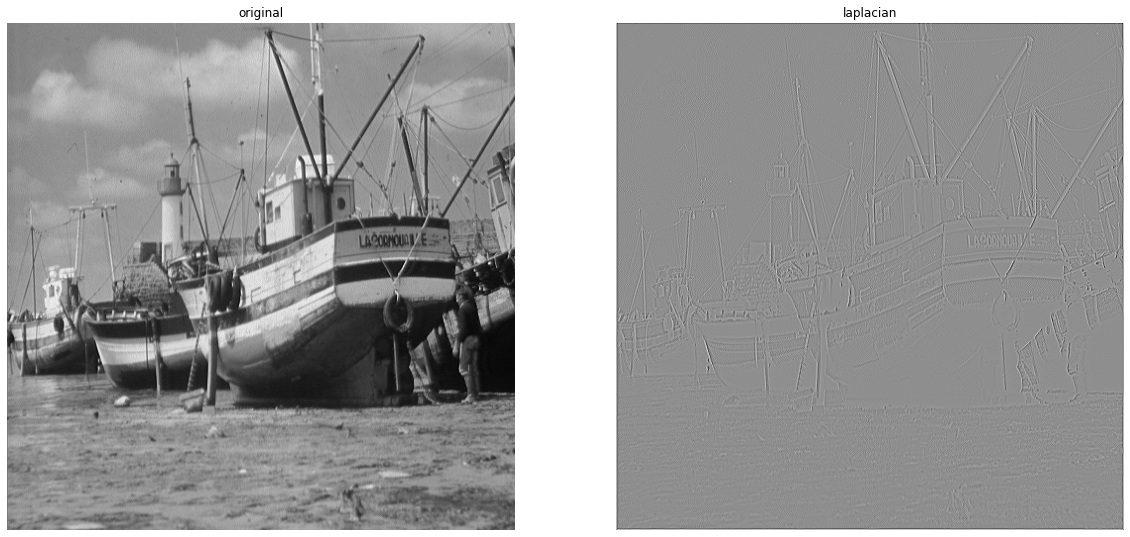

In [5]:
# Exercise 3

im = imread('fishing_boat.tiff')

laplacian = [
    [0, 1, 0],
    [1,-4, 1],
    [0, 1, 0]
]

imLa = convolve2d(im, laplacian)

plt.figure(figsize=(20, 10))
plt.subplot(121), plt.imshow(im, cmap='gray'), plt.title('original'), plt.axis('off')
plt.subplot(122), plt.imshow(imLa, cmap='gray'), plt.title('laplacian'), plt.axis('off')
plt.show()

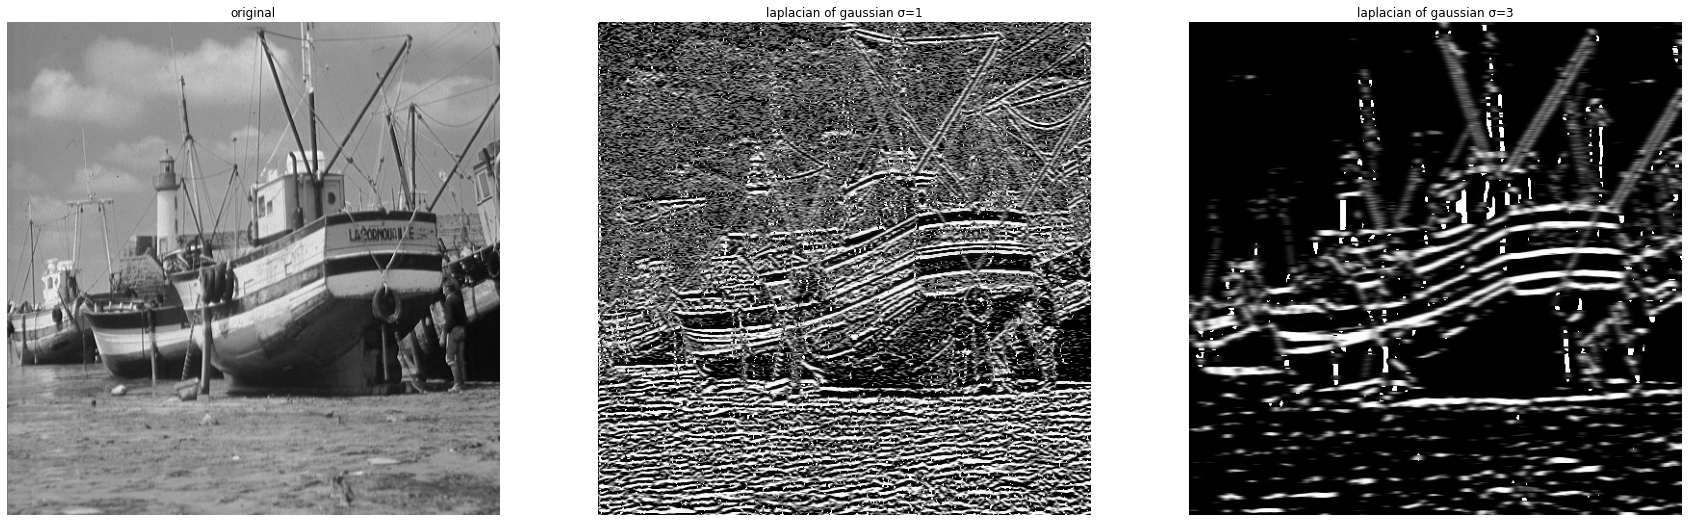

In [6]:
# Exercise 4

im = imread('fishing_boat.tiff')

imGaLa1 = gaussian_laplace(im, 1)
imGaLa3 = gaussian_laplace(im, 3)

plt.figure(figsize=(30, 10))
plt.subplot(131), plt.imshow(im, cmap='gray'), plt.title('original'), plt.axis('off')
plt.subplot(132), plt.imshow(imGaLa1, cmap='gray'), plt.title('laplacian of gaussian σ=1'), plt.axis('off')
plt.subplot(133), plt.imshow(imGaLa3, cmap='gray'), plt.title('laplacian of gaussian σ=3'), plt.axis('off')
plt.show()

In [7]:
# Exercise 5

im = imread('fishing_boat.tiff')

kernel3x3 = np.full((3, 3), 1/9)
kernel3x3a = np.full((1, 3), 1/3)
kernel3x3b = np.full((3, 1), 1/3)

kernel5x5 = np.full((5, 5), 1/25)
kernel5x5a = np.full((1, 5), 1/5)
kernel5x5b = np.full((5, 1), 1/5)

kernel11x11 = np.full((11, 11), 1/121)
kernel11x11a = np.full((1, 11), 1/11)
kernel11x11b = np.full((11, 1), 1/11)

kernel77x77 = np.full((77, 77), 1/5929)
kernel77x77a = np.full((1, 77), 1/77)
kernel77x77b = np.full((77, 1), 1/77)

# 3x3
start = time()
im3x3 = convolve2d(im, kernel3x3)
print('3x3 non-separable:', time() - start, 's')

start = time()
im3x3a = convolve2d(im, kernel3x3a)
im3x3ab = convolve2d(im, kernel3x3b)
print('3x3 separable:', time() - start, 's\n')

# 5x5
start = time()
im5x5 = convolve2d(im, kernel5x5)
print('5x5 non-separable:', time() - start, 's')

start = time()
im5x5a = convolve2d(im, kernel5x5a)
im5x5ab = convolve2d(im, kernel5x5b)
print('5x5 separable:', time() - start, 's\n')

# 11x11
start = time()
im11x11 = convolve2d(im, kernel11x11)
print('11x11 non-separable:', time() - start, 's')

start = time()
im11x11a = convolve2d(im, kernel11x11a)
im11x11ab = convolve2d(im, kernel11x11b)
print('11x11 separable:', time() - start, 's\n')

# 77x77
start = time()
im77x77 = convolve2d(im, kernel77x77)
print('77x77 non-separable:', time() - start, 's')

start = time()
im77x77a = convolve2d(im, kernel77x77a)
im77x77ab = convolve2d(im, kernel77x77b)
print('77x77 separable:', time() - start, 's')

3x3 non-separable: 0.015996932983398438 s
3x3 separable: 0.01900196075439453 s

5x5 non-separable: 0.0670008659362793 s
5x5 separable: 0.03699922561645508 s

11x11 non-separable: 0.2350001335144043 s
11x11 separable: 0.05199885368347168 s

77x77 non-separable: 5.695897579193115 s
77x77 separable: 0.29000234603881836 s
